# Podstawowe informacje

**Źródło danych:** 
https://www.kaggle.com/maricinnamon/harry-potter-movies-dataset-starter-notebook/data

**Wykorzystane pliki z setu:** 
* Characters.csv - jest to zbiór wszystkich postaci występujących w serii filmów o Harrym Poterze.

**Dysponując takim zbiorem danych, chce sprawdzić:**
1. Ile postaci posiada to samo nazwisko?
2. Ile nazwisk występuje tylko raz?
3. Które 5 nazwisk występuje najczęściej?
4. Ile procent postaci to kobiety, a ile mężczyzni?

## Analiza pliku

### Importowanie bibliotek

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

### Przygotowanie danych z tabeli Characters.csv

In [62]:
# 1. Pobranie tabel:
df_characters = pd.read_csv('Harry_Potter_Movies\Characters.csv')
df_dialogue = pd.read_csv('Harry_Potter_Movies\Dialogue.csv')

In [63]:
# Usuwanie zbędnych kolumn
df_characters.drop(['House', 'Patronus' ,'Wand (Wood)', 'Wand (Core)'], axis=1, inplace=True)

# Usuwanie pustych pozycji
df_characters.dropna(axis=0, how='any', inplace=True)

# Uporządkowanie kolumny gatunków
df_characters.loc[df_characters['Species'] != 'Human', 'Species'] = 'Other'

# Uporządkowanie kolumny płci
df_characters.loc[df_characters['Gender'] == 'Human', 'Gender'] = 'Male'

# Ustawienie kategorii
df_characters['Gender'] = df_characters['Gender'].astype('category')
df_characters['Species'] = df_characters['Species'].astype('category')

# Dodanie kolumn z samym nazwiskiem  
df_characters['Name'] = df_characters['Character Name'].str.split(' ', expand=True)[0]
df_characters['Surname'] = df_characters['Character Name'].str.split(' ', expand=True)[1]

# Usuwanie pustych pozycji w kolumnie Surname
df_characters.dropna(axis=0, how='any', inplace=True)

df_characters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 124
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Character ID    107 non-null    int64   
 1   Character Name  107 non-null    object  
 2   Species         107 non-null    category
 3   Gender          107 non-null    category
 4   Name            107 non-null    object  
 5   Surname         107 non-null    object  
dtypes: category(2), int64(1), object(3)
memory usage: 4.6+ KB


### Ile postaci posiada to samo nazwisko?

In [64]:
df_counts_surname = df_characters.groupby(['Surname']).size().reset_index(name='counts').sort_values('counts')

df_counts_surname[df_counts_surname['counts'] > 1].sum()


Surname    BlackLovegoodDumbledoreCrouchDiggoryPatilMalfo...
counts                                                    34
dtype: object

### Ile nazwisk występuje tylko raz?

In [65]:
df_counts_surname[df_counts_surname['counts'] == 1].sum()

Surname    BagshotPomfreyPettigrewParkinsonOllivanderMyrt...
counts                                                    73
dtype: object

### Które 5 nazwisk występuje najczęściej?

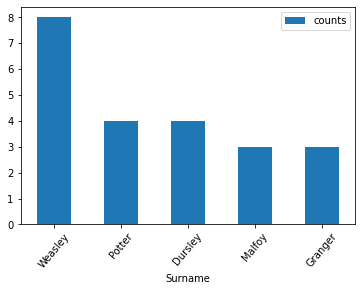

In [66]:
top_five_surname = df_characters.groupby(['Surname']).size().reset_index(name='counts').sort_values('counts', ascending=False)[0:5]
plot = top_five_surname.plot.bar(x='Surname', y='counts', rot=50)


### Ile procent postaci to mężczyzni, a ile kobiety?

Po zmianie widać, że w tabeli są tylko dwa rodzaje płci Kobieta (Female) i Mężczyzna (Male). Na pierwszy rzut oka widać, że kobiet jest dwa razy mniej niż mężczyzn. Co potwierdza poniższy wykres.

Text(0.5, 1.0, 'Podział % płci postaci w serii Harry Potter')

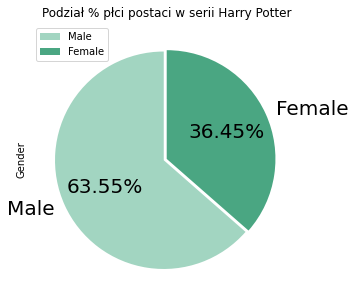

In [67]:
gender = df_characters['Gender'].value_counts();

plot = gender.plot.pie(
    figsize=(5,5), 
    legend=True, 
    fontsize=20,
    colors=['#a2d5c1', '#4aa682'],
    autopct = '%1.2f%%',
    explode=(0.030,0),
    startangle = 90,
    );
plt.title('Podział % płci postaci w serii Harry Potter')

# Podsumowanie

Po przeanalizowaniu pliku Characters zawierajacego informacje o postaciach występujących w serii filmów o Harrym Poterze udało mi się ustalić, że:
* 73 nazwiska ze 107 nazwisk sklasyfikowanych jako gatunek Człowiek występuje tylko raz
* 34 naziwska pojawiają się więcej niż raz
* najwięcej postaci posiada nazwisko "Weasley" (8 razy) - patrz wykres powyżej
* 63,55% postaci stanowią mężczyźni, a 36,45% Kobiety 